In [1]:
pip install umap-learn

     |████████████████████████████████| 88 kB 740 kB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 42.1 MB 1.6 MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82819 sha256=986355468342dfdb59400270287a3dd0f7fa87b4815e95a514df6cc486ad85d7
  Stored in directory: /home/yuchen.yang@insilico.ai/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55623 sha256=ddbead037d6ecfe6b3aa1cc2b287b8841c2b3743bc8b2189103a2ec9af1027e6
  Stored in directory: /home/yuchen.yang@insilico.ai/.cache/pip/wheels/f8/32/54/fa1fd0454e0441eaa32550ea2a86da3f64eb7c8e5a82436770
Successfully built umap-learn pynndescent
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#从这里开始

In [42]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'CDK9':'#0072b2',
             'KCNQ2':'#d55e00',
             'AKR1B1':'#009e73',
             'GHSR':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline

In [43]:
#df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/SLPP_cp_gene_partly2.csv')
#df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen//MLP_anoth_part4.csv')
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen//MLP_seen_new.csv')
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)
#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
 #       "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)
X_embedded_df

/tmp/ipykernel_2561551/1735002344.py:3: DtypeWarning: Columns (3,7,8,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen//MLP_seen_new.csv')


,Batch,Plate,Modality,Pert,Gene,umap 1,umap 2
0,2020_11_04_CPJUMP1,BR00116991,Compound,trt,CDK9,9.221929,1.745756
1,2020_11_04_CPJUMP1,BR00116992,Compound,trt,CDK9,9.126725,1.707267
2,2020_11_04_CPJUMP1,BR00116993,Compound,trt,CDK9,9.165446,1.742808
3,2020_11_04_CPJUMP1,BR00116994,Compound,trt,CDK9,9.150087,1.717848
4,2020_11_04_CPJUMP1,BR00117015,Compound,trt,CDK9,-0.553364,2.654238
...,...,...,...,...,...,...,...
6254,2020_11_04_CPJUMP1,BR00118045,CRISPR,trt,ABL1,8.737111,3.353004
6255,2020_11_04_CPJUMP1,BR00118045,CRISPR,trt,GPR119,8.776317,3.295809
6256,2020_11_04_CPJUMP1,BR00118045,CRISPR,trt,OPRM1,8.724113,3.287243
6257,2020_11_04_CPJUMP1,BR00118045,CRISPR,trt,S1PR1,8.174961,1.033017


In [44]:
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('CDK9|KCNQ2|AKR1B1|GHSR')]
X_embedded_df['Gene'].value_counts()

Gene
CDK9      52
KCNQ2     52
GHSR      52
AKR1B1    52
Name: count, dtype: int64

In [45]:
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)

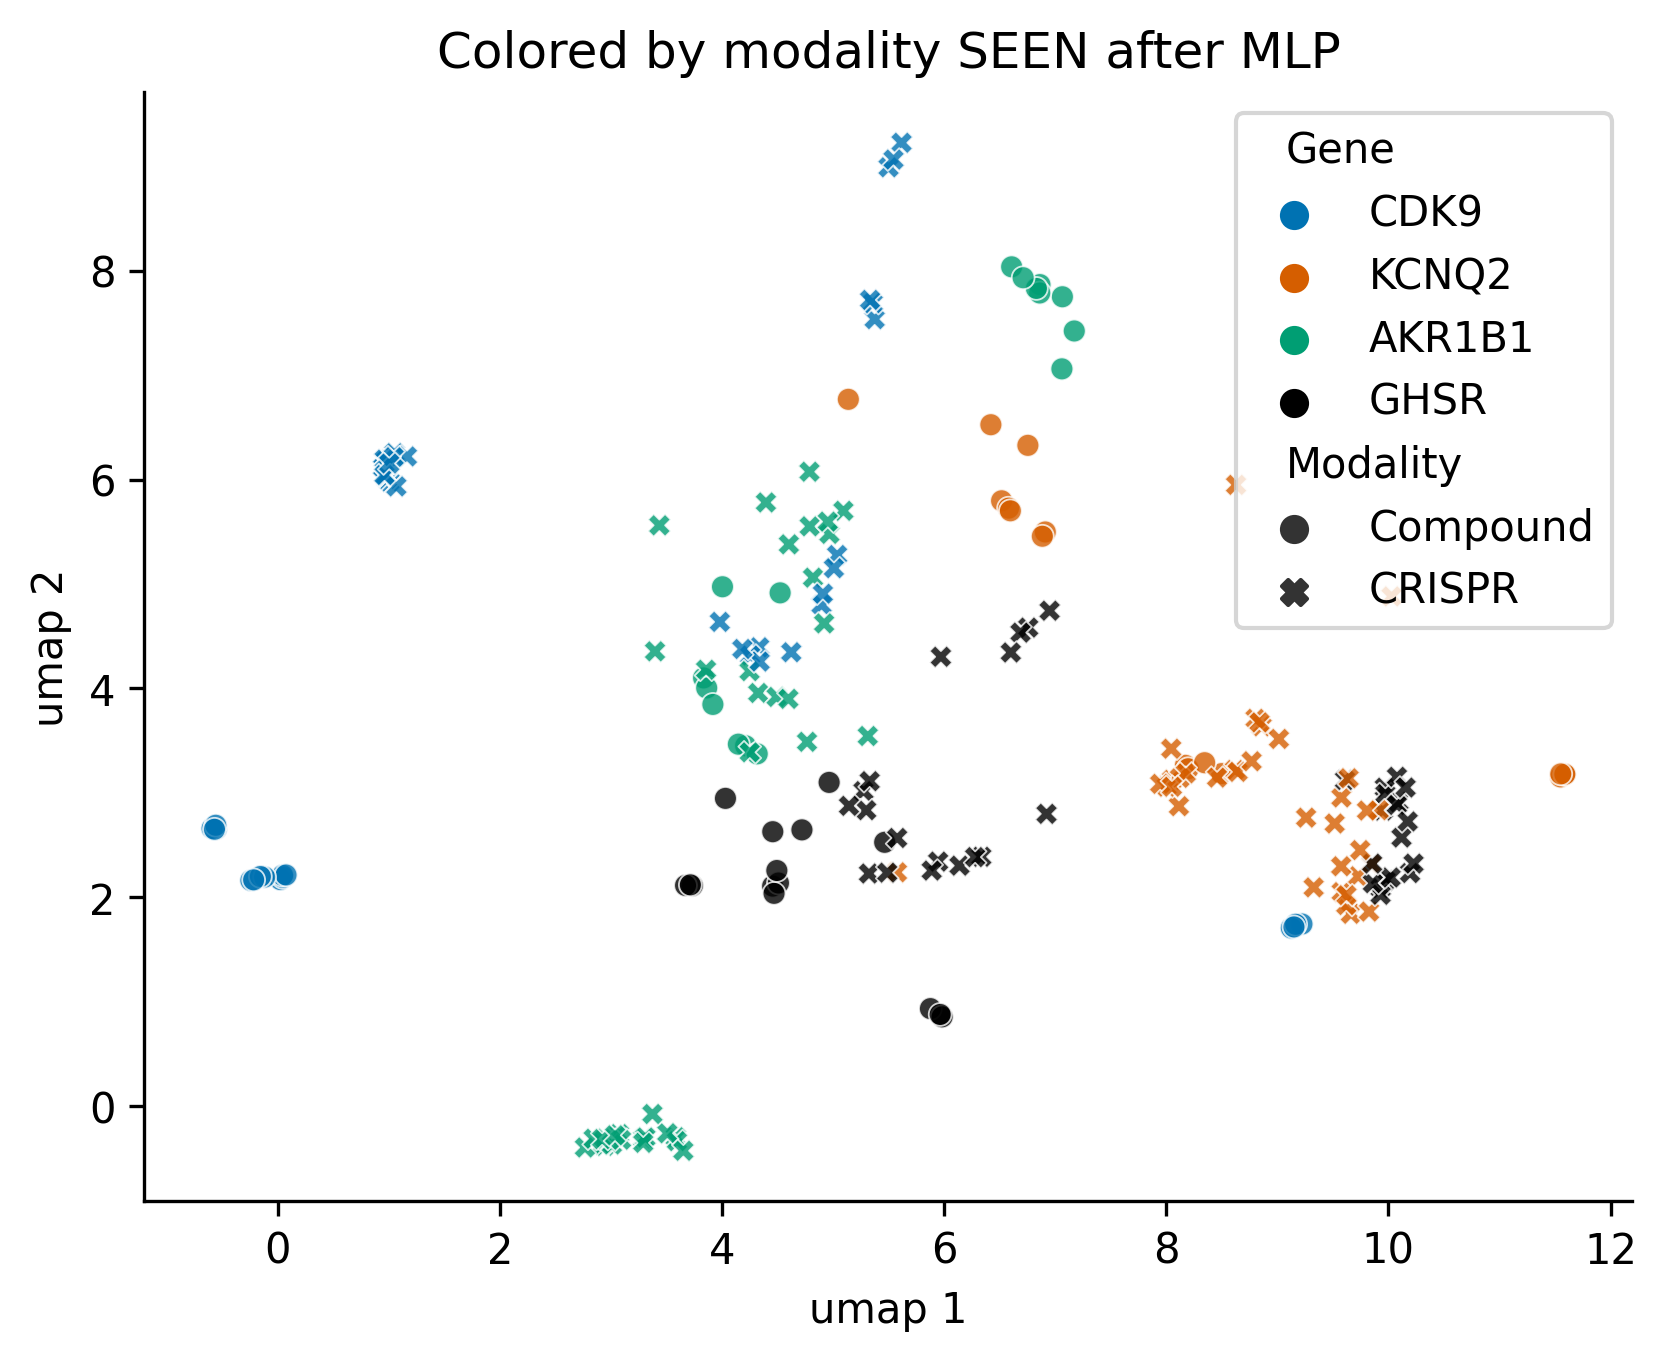

In [46]:
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['CDK9','KCNQ2','AKR1B1','GHSR'],
    
    alpha=0.8,
    s=30,
    style='Modality'
)

#plt.figure(figsize=(100,80))
plt.title("Colored by modality SEEN after MLP")
sns.despine()
#plt.savefig("figures/4.A549_gene.png")

In [47]:
'''
bb1=A549_short_df[A549_short_df['Modality']=='CRISPR']
bb1=bb1.reset_index()
bb1=bb1.iloc[:,1:]
bb1['Gene'].unique()
'''

"\nbb1=A549_short_df[A549_short_df['Modality']=='CRISPR']\nbb1=bb1.reset_index()\nbb1=bb1.iloc[:,1:]\nbb1['Gene'].unique()\n"

In [48]:
'''
A549_short_df=A549_short_df.reset_index()
A549_short_df=A549_short_df.iloc[:,1:]
bb1=A549_short_df[A549_short_df['Modality']=='CRISPR']
bb1=bb1.reset_index()
bb1=bb1.iloc[:,1:]
bb2=A549_short_df[A549_short_df['Modality']=='Compound']
bb2=bb2.reset_index()
bb2=bb2.iloc[:,1:]
lst1=bb1['Gene'].unique()
# this is for crispr
umap1=[]
umap2=[]
val1=[]
val2=[]
for i in lst1:
    for j in range(len(bb1)):
        if bb1['Gene'][j]==i:
            umap1.append(bb1['umap 1'][j])
            umap2.append(bb1['umap 2'][j])
    val1.append(sum(umap1)/len(umap1))
    val2.append(sum(umap2)/len(umap2))
    
# this is for compound
umap12=[]
umap22=[]
val12=[]
val22=[]
for i in lst1:
    for j in range(len(bb2)):
        if bb2['Gene'][j]==i:
            umap12.append(bb2['umap 1'][j])
            umap22.append(bb2['umap 2'][j])
    val12.append(sum(umap12)/len(umap12))
    val22.append(sum(umap22)/len(umap22))

lsf=[]
for i in range(len(val1)):
    lsf.append(math.sqrt((val12[i]-val1[i])*(val12[i]-val1[i])+(val22[i]-val2[i])*(val22[i]-val2[i])))
    
lls=pd.DataFrame(columns=['Gene','Mean_Distance'],dtype=float)
lls['Gene']=lst1
print('Mean Distance for MLP')
lls['Mean_Distance']=lsf
lls
'''

"\nA549_short_df=A549_short_df.reset_index()\nA549_short_df=A549_short_df.iloc[:,1:]\nbb1=A549_short_df[A549_short_df['Modality']=='CRISPR']\nbb1=bb1.reset_index()\nbb1=bb1.iloc[:,1:]\nbb2=A549_short_df[A549_short_df['Modality']=='Compound']\nbb2=bb2.reset_index()\nbb2=bb2.iloc[:,1:]\nlst1=bb1['Gene'].unique()\n# this is for crispr\numap1=[]\numap2=[]\nval1=[]\nval2=[]\nfor i in lst1:\n    for j in range(len(bb1)):\n        if bb1['Gene'][j]==i:\n            umap1.append(bb1['umap 1'][j])\n            umap2.append(bb1['umap 2'][j])\n    val1.append(sum(umap1)/len(umap1))\n    val2.append(sum(umap2)/len(umap2))\n    \n# this is for compound\numap12=[]\numap22=[]\nval12=[]\nval22=[]\nfor i in lst1:\n    for j in range(len(bb2)):\n        if bb2['Gene'][j]==i:\n            umap12.append(bb2['umap 1'][j])\n            umap22.append(bb2['umap 2'][j])\n    val12.append(sum(umap12)/len(umap12))\n    val22.append(sum(umap22)/len(umap22))\n\nlsf=[]\nfor i in range(len(val1)):\n    lsf.append(ma

In [49]:
#df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/SLPP_cp_gene_partly2.csv')
#df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen//SLPP_cp_gene_partly4.csv')
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen//MLP_seen_old.csv')
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)






#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
 #       "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)


/tmp/ipykernel_2561551/371404936.py:3: DtypeWarning: Columns (2,3,6,7,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen//MLP_seen_old.csv')


In [50]:
X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('CDK9|KCNQ2|AKR1B1|GHSR')]
X_embedded_df['Gene'].value_counts()

Gene
CDK9      52
KCNQ2     52
GHSR      52
AKR1B1    52
Name: count, dtype: int64

In [51]:
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)

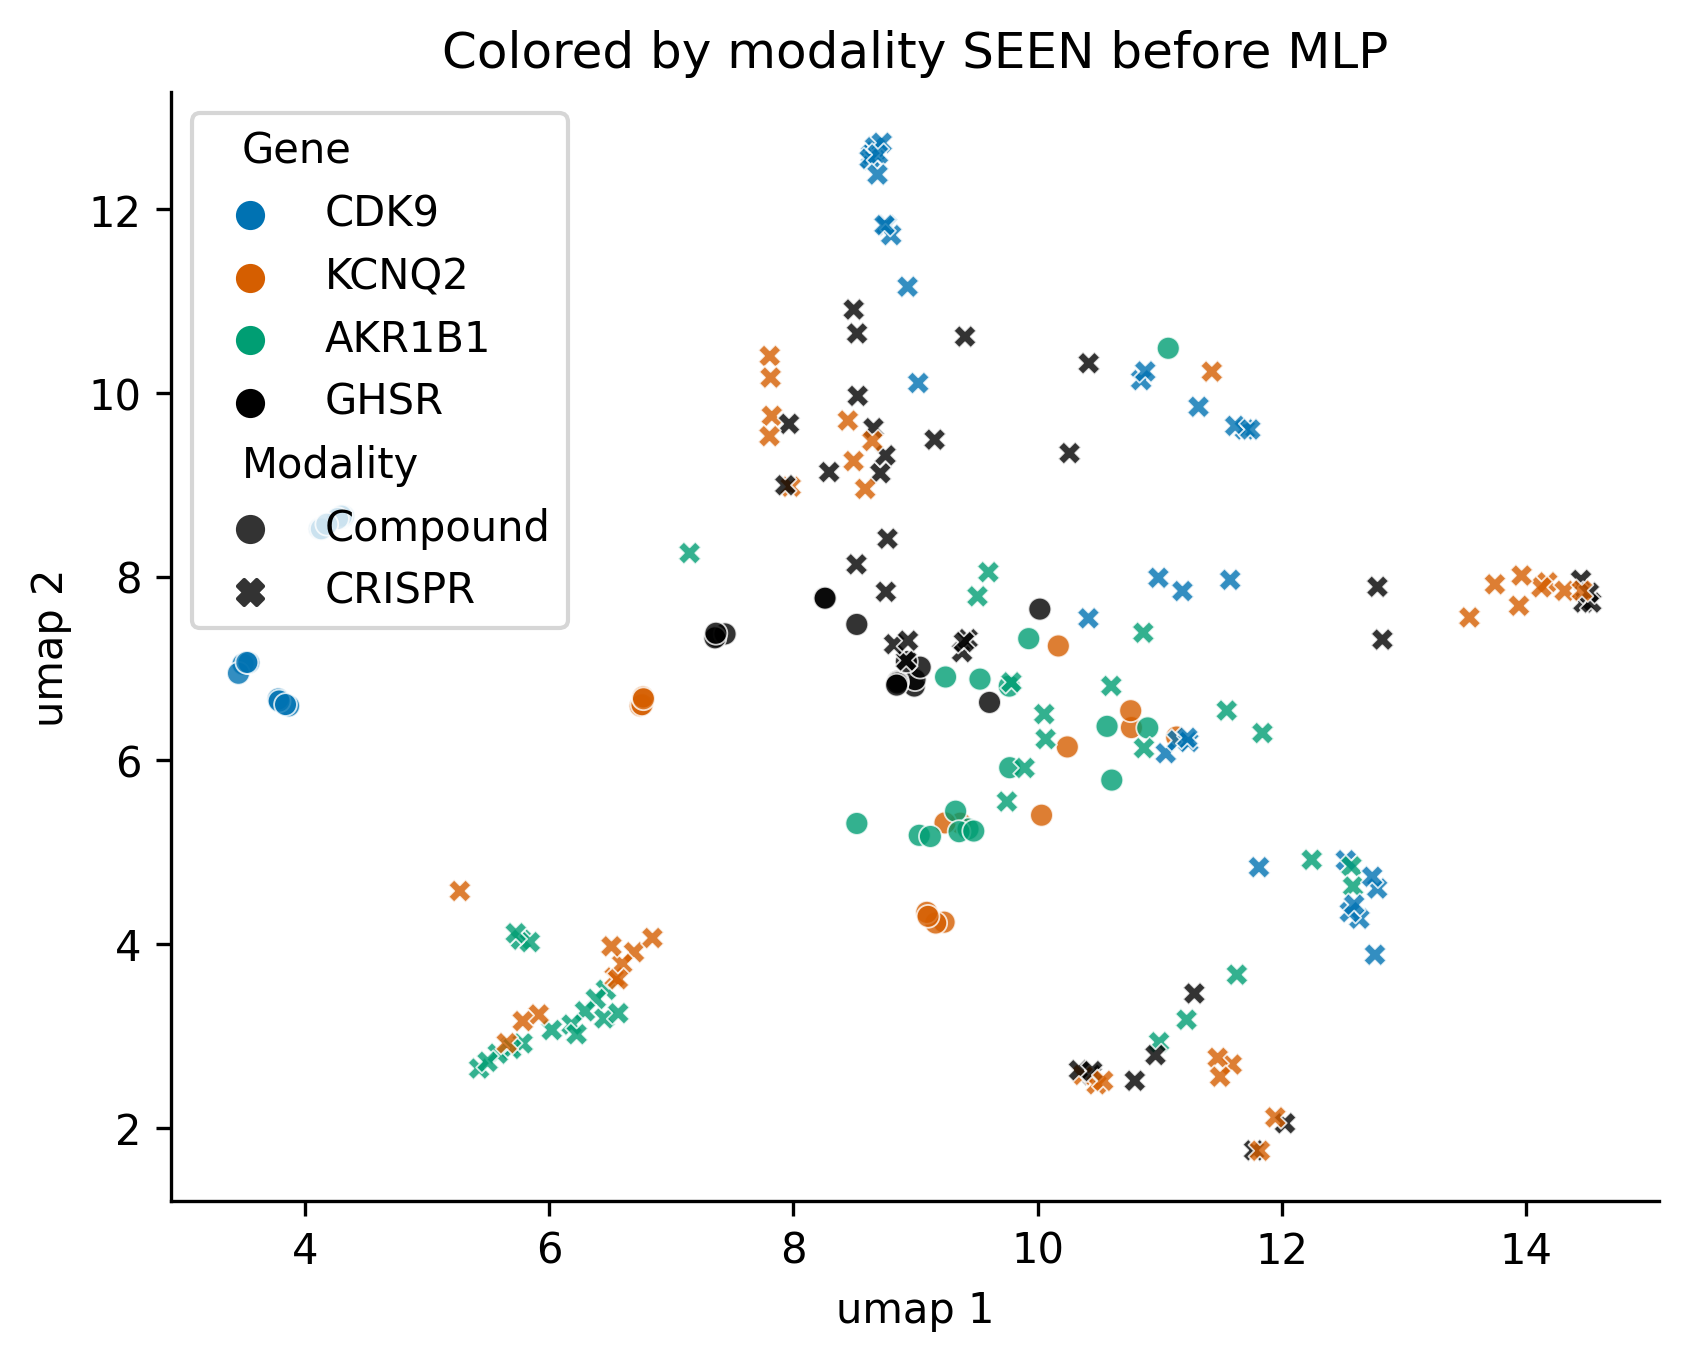

In [52]:


sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['CDK9','KCNQ2','AKR1B1','GHSR'],
    
    alpha=0.8,
    s=30,
    style='Modality'
)

#plt.figure(figsize=(100,80))
plt.title("Colored by modality SEEN before MLP")
sns.despine()
#plt.savefig("figures/4.A549_gene.png")

In [53]:
'''
A549_short_df=A549_short_df.reset_index()
A549_short_df=A549_short_df.iloc[:,1:]
bb1=A549_short_df[A549_short_df['Modality']=='CRISPR']
bb1=bb1.reset_index()
bb1=bb1.iloc[:,1:]
bb2=A549_short_df[A549_short_df['Modality']=='Compound']
bb2=bb2.reset_index()
bb2=bb2.iloc[:,1:]
#lst1=bb1['Gene'].unique()

# this is for crispr
umap1=[]
umap2=[]
val1=[]
val2=[]
for i in lst1:
    for j in range(len(bb1)):
        if bb1['Gene'][j]==i:
            umap1.append(bb1['umap 1'][j])
            umap2.append(bb1['umap 2'][j])
    val1.append(sum(umap1)/len(umap1))
    val2.append(sum(umap2)/len(umap2))
    
# this is for compound
umap12=[]
umap22=[]
val12=[]
val22=[]
for i in lst1:
    for j in range(len(bb2)):
        if bb2['Gene'][j]==i:
            umap12.append(bb2['umap 1'][j])
            umap22.append(bb2['umap 2'][j])
    val12.append(sum(umap12)/len(umap12))
    val22.append(sum(umap22)/len(umap22))

lsf=[]
for i in range(len(val1)):
    lsf.append(math.sqrt((val12[i]-val1[i])*(val12[i]-val1[i])+(val22[i]-val2[i])*(val22[i]-val2[i])))
    
lls1=pd.DataFrame(columns=['Gene','Mean_Distance'],dtype=float)
lls1['Gene']=lst1
print('Mean Distance for SLPP')
lls1['Mean_Distance']=lsf
lls1
'''

"\nA549_short_df=A549_short_df.reset_index()\nA549_short_df=A549_short_df.iloc[:,1:]\nbb1=A549_short_df[A549_short_df['Modality']=='CRISPR']\nbb1=bb1.reset_index()\nbb1=bb1.iloc[:,1:]\nbb2=A549_short_df[A549_short_df['Modality']=='Compound']\nbb2=bb2.reset_index()\nbb2=bb2.iloc[:,1:]\n#lst1=bb1['Gene'].unique()\n\n# this is for crispr\numap1=[]\numap2=[]\nval1=[]\nval2=[]\nfor i in lst1:\n    for j in range(len(bb1)):\n        if bb1['Gene'][j]==i:\n            umap1.append(bb1['umap 1'][j])\n            umap2.append(bb1['umap 2'][j])\n    val1.append(sum(umap1)/len(umap1))\n    val2.append(sum(umap2)/len(umap2))\n    \n# this is for compound\numap12=[]\numap22=[]\nval12=[]\nval22=[]\nfor i in lst1:\n    for j in range(len(bb2)):\n        if bb2['Gene'][j]==i:\n            umap12.append(bb2['umap 1'][j])\n            umap22.append(bb2['umap 2'][j])\n    val12.append(sum(umap12)/len(umap12))\n    val22.append(sum(umap22)/len(umap22))\n\nlsf=[]\nfor i in range(len(val1)):\n    lsf.append

In [54]:
import utils
import pandas as pd
import plotly.express as px
#from umap import UMAP
from umap.umap_ import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
color_discrete_map_seaborn = {
    "Modality": {
        "Compound": "#0072b2",
        "CRISPR": "#d55e00",
        "ORF": "#009e73",
    },
    "Pert": {
        "trt": "#0072b2",
        "negcon": "#d55e00",
        "poscon": "#009e73",
    },
    "Density": {
        80: "#0072b2",
        100: "#d55e00",
        120: "#009e73",
    },
    "Cell_line": {
        'Parental': "#0072b2",
        'Cas9': "#d55e00",
    },
    "Gene": {'CHRM2':'#0072b2',
             'TNF':'#d55e00',
             'KCNK1':'#009e73',
             'PDE7A':'black'
    }
}
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

%matplotlib inline

In [55]:

df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_unseen_new.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)


/tmp/ipykernel_2561551/3065715193.py:1: DtypeWarning: Columns (3,7,8,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_unseen_new.csv')


In [56]:

X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('CHRM2|TNF|KCNK1|PDE7A')]
X_embedded_df['Gene'].value_counts()

Gene
TNF      84
PDE7A    84
KCNK1    84
CHRM2    84
Name: count, dtype: int64

In [57]:

A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)

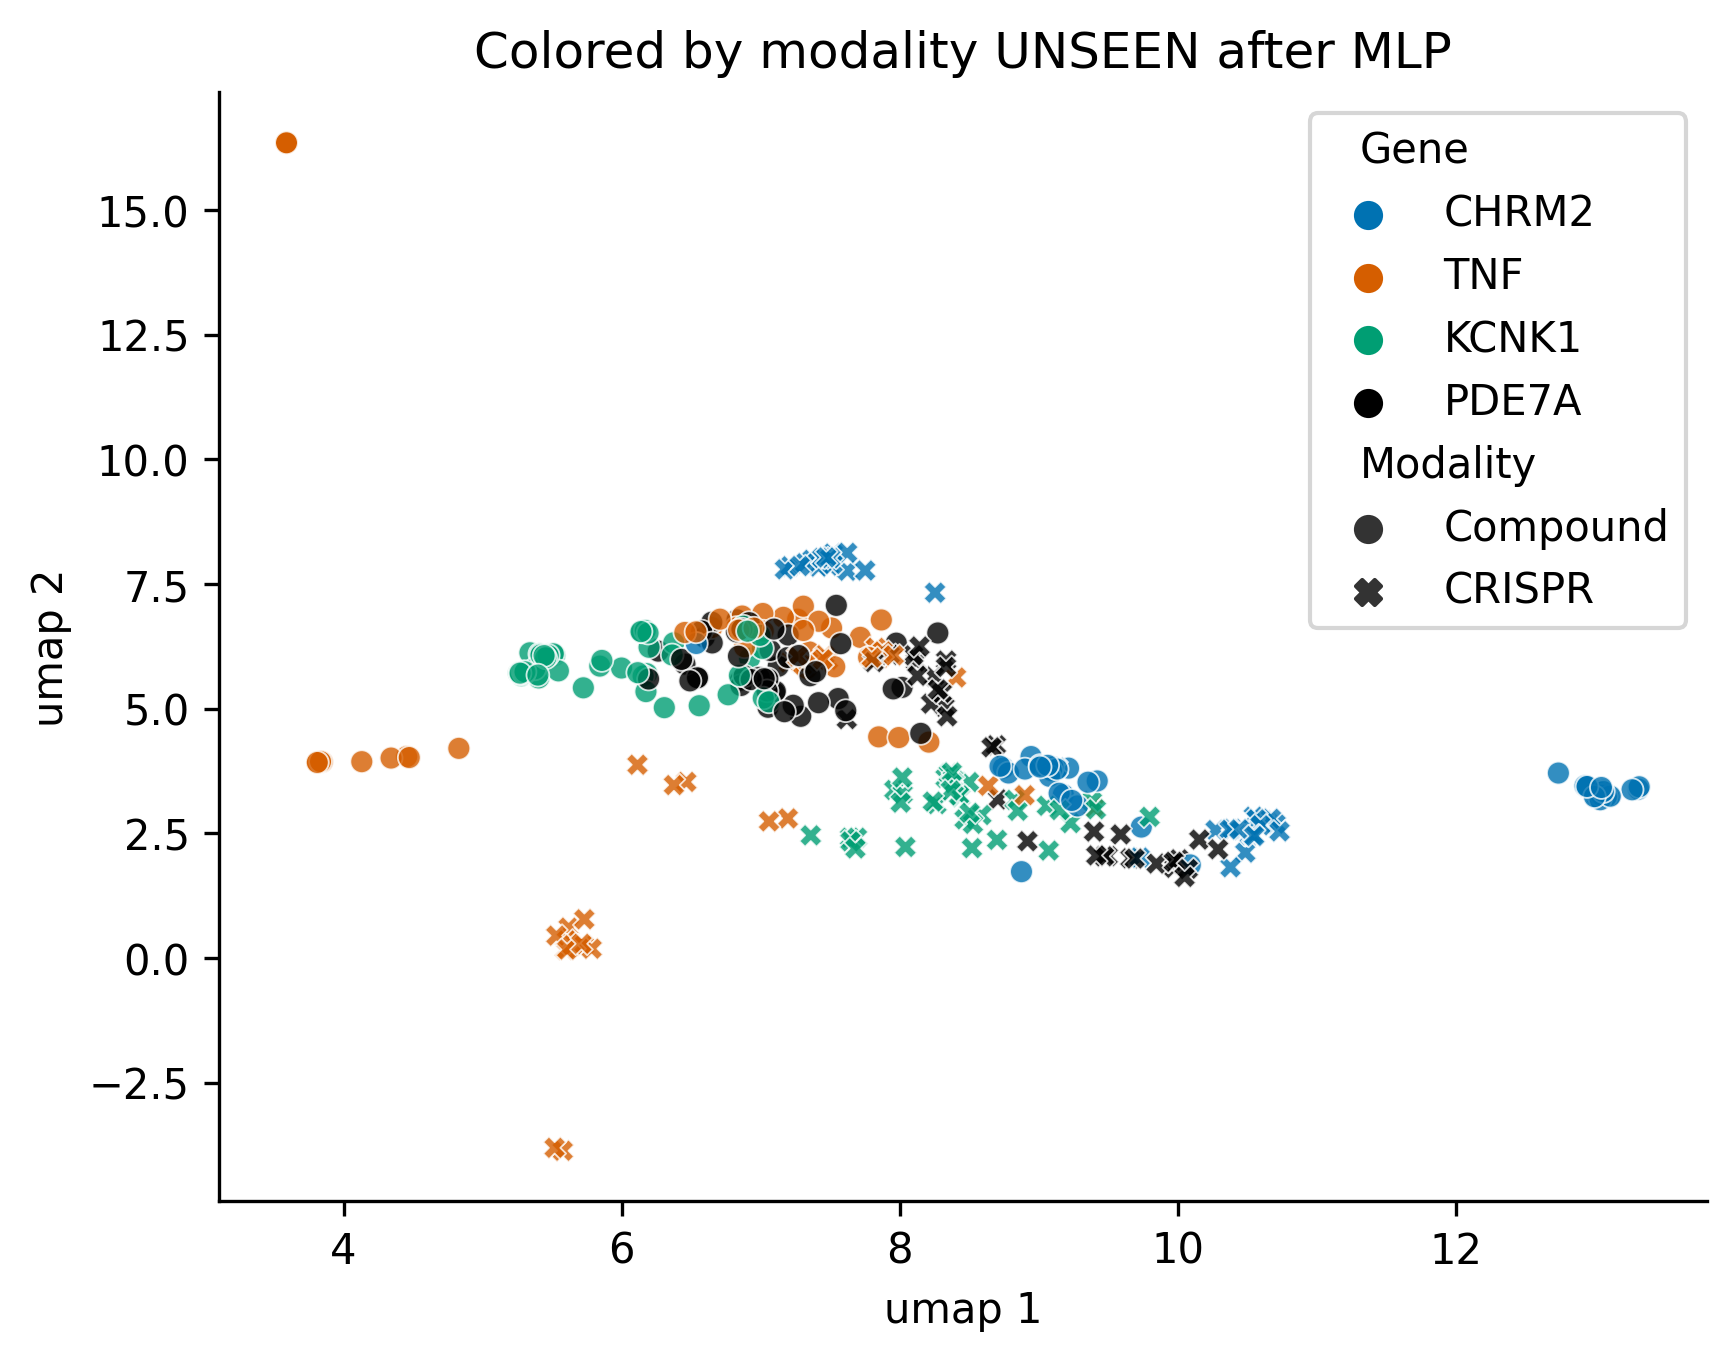

In [58]:



sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['CHRM2','TNF','KCNK1','PDE7A'],
    alpha=0.8,
    s=30,
    style='Modality'
)

#plt.figure(figsize=(100,80))
plt.title("Colored by modality UNSEEN after MLP")
sns.despine()
plt.savefig("figures/4.A549_modality.png")

/tmp/ipykernel_2561551/4197887589.py:1: DtypeWarning: Columns (3,6,7,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_unseen_old.csv')


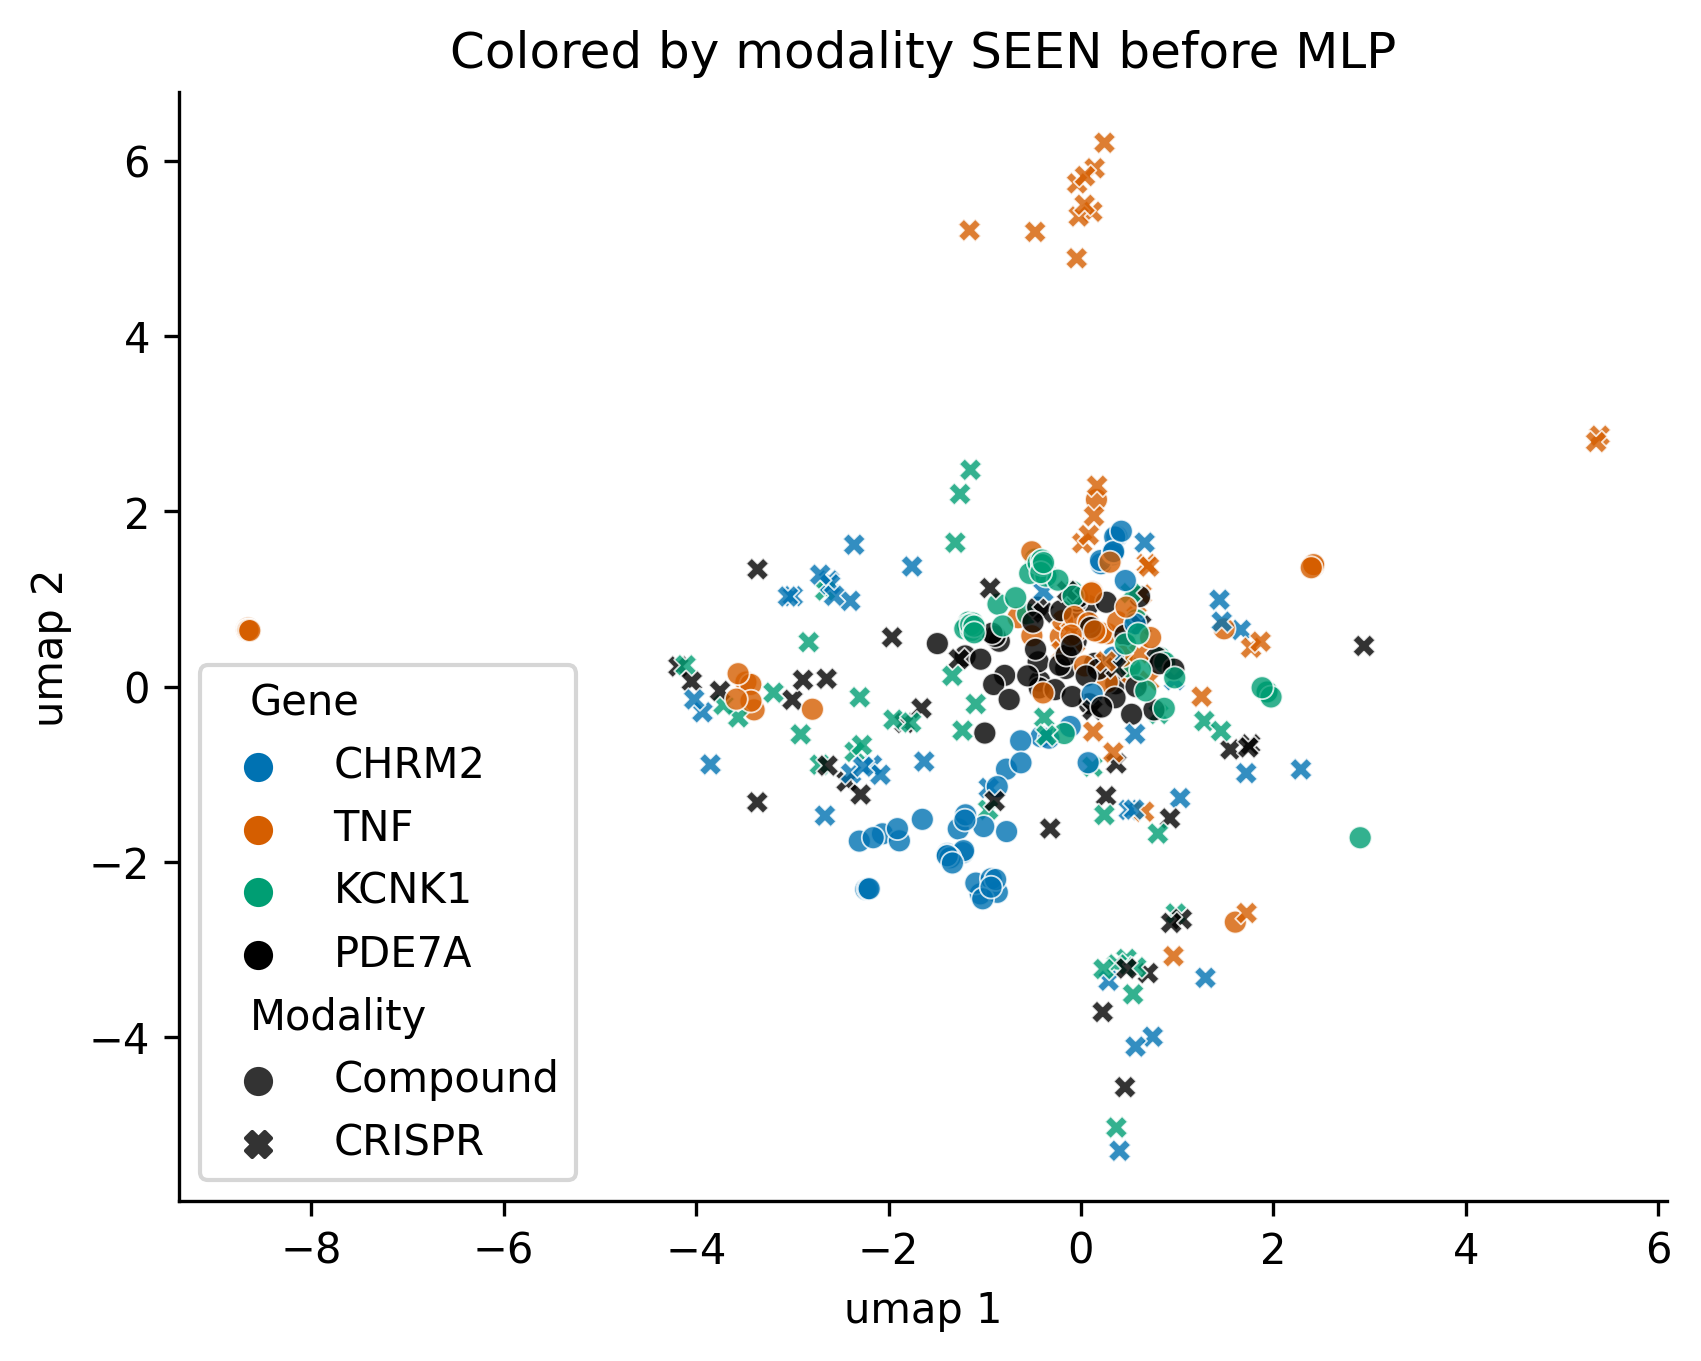

In [59]:
df=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_unseen_old.csv')
df=df[df['Metadata_experiment_type']!='ORF']
df['Metadata_control_type']=df['Metadata_control_type'].fillna(value='trt')
df=df[df['Metadata_control_type'].str.contains('trt')]
dd=(df['Metadata_Plate'].value_counts())
dd1=dd.index.tolist()
df=df.iloc[:,2:]
df.insert(loc=2, column='Metadata_batch', value='2020_11_04_CPJUMP1') 
df=df.rename(columns={'Metadata_experiment_type':'Metadata_modality'})
df=df.rename(columns={'Metadata_cell_line':'Metadata_cell'})
X = utils.get_featuredata(df)
all_plates_df=df
umap_2d = UMAP(n_components=2, random_state=9000)
projection_2d = umap_2d.fit_transform(X)

batch_list = list(all_plates_df.Metadata_batch)
plate_list = list(all_plates_df.Metadata_Plate)
modality_list = list(all_plates_df.Metadata_modality)
pert_list = np.where(
    all_plates_df.Metadata_pert_type == "control",
    all_plates_df.Metadata_control_type,
    "trt",
)
gene_list = list(all_plates_df.Metadata_gene)
#cell_list = list(all_plates_df.Metadata_cell)



#time_list = list(all_plates_df.Metadata_time)
#cell_line_list = list(all_plates_df.Metadata_cell_line)
#time_delay_list = list(all_plates_df.Metadata_time_delay)
#times_imaged_list = list(all_plates_df.Metadata_times_imaged)
#density_list = list(all_plates_df.Metadata_density)
#antibiotics_list = list(all_plates_df.Metadata_antibiotics)

X_embedded_df = pd.DataFrame(
    {
        "Batch": batch_list,
        "Plate": plate_list,
        "Modality": modality_list,
        "Pert": pert_list,
        "Gene": gene_list,
        #"time": time_list,
#        "Cell": cell_list,
        #"Cell_line": cell_line_list,
      #  "Days": time_delay_list,
       # "Times_imaged": times_imaged_list,
       # "Density": density_list,
       # "Antibiotics": antibiotics_list,
        "umap 1": projection_2d[:, :1].flatten(),
        "umap 2": projection_2d[:, 1:2].flatten(),
    }
)

X_embedded_df=X_embedded_df.dropna(subset=['Gene'])
X_embedded_df=X_embedded_df[X_embedded_df['Gene'].str.contains('CHRM2|TNF|KCNK1|PDE7A')]
X_embedded_df['Gene'].value_counts()
A549_short_df = (
    X_embedded_df.query('Batch=="2020_11_04_CPJUMP1"')
    #.query('Cell=="A549"')
    .replace(
        {"poscon_cp": "poscon", "poscon_diverse": "poscon", "poscon_orf": "poscon"}
    )
)
sns.scatterplot(
    data=A549_short_df,
    x="umap 1",
    y="umap 2",
    hue=A549_short_df["Gene"],
    palette=color_discrete_map_seaborn["Gene"],
    hue_order=['CHRM2','TNF','KCNK1','PDE7A'],
    alpha=0.8,
    s=30,
    style='Modality'
)

#plt.figure(figsize=(100,80))
plt.title("Colored by modality SEEN before MLP")
sns.despine()
plt.savefig("figures/4.A549_modality.png")